## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.

en entrée : z et x

Un auto-encodeur variationnel est utilisé pour encoder l'information spatiale à partir de x.  x se projette donc sur un espace 2D encodant la position de l'objet dans l'espace (action).

z se projette sur un espace de caracteristiques n x 2D (n = 32)

l'information encodee dans u  est appliquee uniformement à chacune des n caracteristiques

le code est ensuite utilisé pour generer une image

validation du code par reconstruction de x en sortie (BCE Loss + KL Loss)

** projection caracteristique par caracteristique ** :

        self.fc_transcode = [0] * LATENT_DIM
        for i in range(LATENT_DIM):
            self.fc_transcode[i] = nn.Linear(2, 256)

et :

        x_hat = 0
        for i in range(LATENT_DIM):
            trans_d1 = u_out[:,0] + z_d1[:,i]
            trans_d2 = u_out[:,1] + z_d2[:,i]
            translated_z = torch.cat((trans_d1.view(-1,1), trans_d2.view(-1,1)), 1)
            x_hat += F.relu(self.fc_transcode[i](translated_z))
            

==> fonctionne remarquablement bien. le code latent respecte la topologie de l'espace (continuité) et les n = 32 caracteristiques 2D permettent de produire une image reconnaissable. 


In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'log_interval': 10, 'seed': 42, 'mean': 0.0, 'epochs': 10, 'batch_size': 50, 'std': 1.0, 'momentum': 0.48, 'verbose': 1, 'lr': 0.001, 'size': 64, 'dimension': 25, 'test_batch_size': 1, 'valid_size': 0.2, 'no_cuda': True, 'num_processes': 1}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [5]:
path = '2018-07-26_actionnable_code_VAE_BIAS_alt.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_VAE_BIAS_alt.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_VAE_BIAS_alt.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f1243e21c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f120c40bd30>)

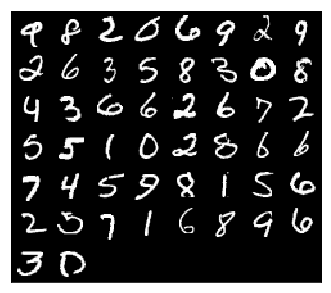

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_label_d1): Linear(in_features=10, out_features=32, bias=False)
  (fc_label_d2): Linear(in_features=10, out_features=32, bias=False)
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=2, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=2, bias=False)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	BCELoss: 141658	KL: 0
	Train Epoch: 1 [500/60000 (1%)]	BCELoss: 69124	KL: 26
	Train Epoch: 1 [1000/60000 (2%)]	BCELoss: 29282	KL: 31
	Train Epoch: 1 [1500/60000 (2%)]	BCELoss: 24980	KL: 0
	Train Epoch: 1 [2000/60000 (3%)]	BCELoss: 24891	KL: 0
	Train Epoch: 1 [2500/60000 (4%)]	BCELoss: 22753	KL: 0
	Train Epoch: 1 [3000/60000 (5%)]	BCELoss: 23520	KL: 0
	Train Epoch: 1 [3500/60000 (6%)]	BCELoss: 22031	KL: 0
	Train Epoch: 1 [4000/60000 (7%)]	BCELoss: 22699	KL: 0
	Train Epoch: 1 [4500/60000 (8%)]	BCELoss: 23092	KL: 0
	Train Epoch: 1 [5000/60000 (8%)]	BCELoss: 20581	KL: 0
	Train Epoch: 1 [5500/60000 (9%)]	BCELoss: 21879	KL: 0
	Train Epoch: 1 [6000/60000 (10%)]	BCELoss: 21677	KL: 1
	Train Epoch: 1 [6500/60000 (11%)]	BCELoss: 22522	KL: 2
	Train Epoch: 1 [7000/60000 (12%)]	BCELoss: 22964	KL: 9
	Train Epoch: 1 [7500/60000 (12%)]	BCELoss: 22086	KL: 30
	Train Epoch: 1 [8000/60000 (13%)]	BCELoss: 19694	KL: 64
	Train Epoch: 1 [8500/60000 (14%)]	BCELoss: 192

	Train Epoch: 2 [10500/60000 (18%)]	BCELoss: 13851	KL: 318
	Train Epoch: 2 [11000/60000 (18%)]	BCELoss: 13254	KL: 323
	Train Epoch: 2 [11500/60000 (19%)]	BCELoss: 13834	KL: 321
	Train Epoch: 2 [12000/60000 (20%)]	BCELoss: 13468	KL: 326
	Train Epoch: 2 [12500/60000 (21%)]	BCELoss: 14051	KL: 334
	Train Epoch: 2 [13000/60000 (22%)]	BCELoss: 13290	KL: 326
	Train Epoch: 2 [13500/60000 (22%)]	BCELoss: 13167	KL: 302
	Train Epoch: 2 [14000/60000 (23%)]	BCELoss: 13215	KL: 324
	Train Epoch: 2 [14500/60000 (24%)]	BCELoss: 13262	KL: 354
	Train Epoch: 2 [15000/60000 (25%)]	BCELoss: 13638	KL: 356
	Train Epoch: 2 [15500/60000 (26%)]	BCELoss: 13884	KL: 316
	Train Epoch: 2 [16000/60000 (27%)]	BCELoss: 12899	KL: 353
	Train Epoch: 2 [16500/60000 (28%)]	BCELoss: 13532	KL: 325
	Train Epoch: 2 [17000/60000 (28%)]	BCELoss: 12964	KL: 355
	Train Epoch: 2 [17500/60000 (29%)]	BCELoss: 14775	KL: 315
	Train Epoch: 2 [18000/60000 (30%)]	BCELoss: 13965	KL: 353
	Train Epoch: 2 [18500/60000 (31%)]	BCELoss: 11668	KL: 3

	Train Epoch: 3 [20500/60000 (34%)]	BCELoss: 11855	KL: 397
	Train Epoch: 3 [21000/60000 (35%)]	BCELoss: 11463	KL: 316
	Train Epoch: 3 [21500/60000 (36%)]	BCELoss: 12248	KL: 392
	Train Epoch: 3 [22000/60000 (37%)]	BCELoss: 11488	KL: 356
	Train Epoch: 3 [22500/60000 (38%)]	BCELoss: 11184	KL: 344
	Train Epoch: 3 [23000/60000 (38%)]	BCELoss: 11244	KL: 361
	Train Epoch: 3 [23500/60000 (39%)]	BCELoss: 11914	KL: 342
	Train Epoch: 3 [24000/60000 (40%)]	BCELoss: 12148	KL: 397
	Train Epoch: 3 [24500/60000 (41%)]	BCELoss: 11918	KL: 397
	Train Epoch: 3 [25000/60000 (42%)]	BCELoss: 12696	KL: 348
	Train Epoch: 3 [25500/60000 (42%)]	BCELoss: 12132	KL: 395
	Train Epoch: 3 [26000/60000 (43%)]	BCELoss: 11757	KL: 372
	Train Epoch: 3 [26500/60000 (44%)]	BCELoss: 11373	KL: 345
	Train Epoch: 3 [27000/60000 (45%)]	BCELoss: 12601	KL: 354
	Train Epoch: 3 [27500/60000 (46%)]	BCELoss: 12008	KL: 363
	Train Epoch: 3 [28000/60000 (47%)]	BCELoss: 11095	KL: 349
	Train Epoch: 3 [28500/60000 (48%)]	BCELoss: 11988	KL: 3

	Train Epoch: 4 [30500/60000 (51%)]	BCELoss: 11597	KL: 346
	Train Epoch: 4 [31000/60000 (52%)]	BCELoss: 11079	KL: 387
	Train Epoch: 4 [31500/60000 (52%)]	BCELoss: 11889	KL: 334
	Train Epoch: 4 [32000/60000 (53%)]	BCELoss: 11186	KL: 354
	Train Epoch: 4 [32500/60000 (54%)]	BCELoss: 11472	KL: 350
	Train Epoch: 4 [33000/60000 (55%)]	BCELoss: 11884	KL: 374
	Train Epoch: 4 [33500/60000 (56%)]	BCELoss: 11330	KL: 345
	Train Epoch: 4 [34000/60000 (57%)]	BCELoss: 11065	KL: 353
	Train Epoch: 4 [34500/60000 (58%)]	BCELoss: 11634	KL: 343
	Train Epoch: 4 [35000/60000 (58%)]	BCELoss: 10447	KL: 370
	Train Epoch: 4 [35500/60000 (59%)]	BCELoss: 11685	KL: 350
	Train Epoch: 4 [36000/60000 (60%)]	BCELoss: 10819	KL: 346
	Train Epoch: 4 [36500/60000 (61%)]	BCELoss: 11089	KL: 339
	Train Epoch: 4 [37000/60000 (62%)]	BCELoss: 11331	KL: 405
	Train Epoch: 4 [37500/60000 (62%)]	BCELoss: 10798	KL: 336
	Train Epoch: 4 [38000/60000 (63%)]	BCELoss: 11603	KL: 353
	Train Epoch: 4 [38500/60000 (64%)]	BCELoss: 11054	KL: 3

	Train Epoch: 5 [40500/60000 (68%)]	BCELoss: 11821	KL: 363
	Train Epoch: 5 [41000/60000 (68%)]	BCELoss: 10218	KL: 357
	Train Epoch: 5 [41500/60000 (69%)]	BCELoss: 10629	KL: 377
	Train Epoch: 5 [42000/60000 (70%)]	BCELoss: 11084	KL: 356
	Train Epoch: 5 [42500/60000 (71%)]	BCELoss: 10453	KL: 351
	Train Epoch: 5 [43000/60000 (72%)]	BCELoss: 10722	KL: 331
	Train Epoch: 5 [43500/60000 (72%)]	BCELoss: 10629	KL: 345
	Train Epoch: 5 [44000/60000 (73%)]	BCELoss: 11117	KL: 358
	Train Epoch: 5 [44500/60000 (74%)]	BCELoss: 10603	KL: 373
	Train Epoch: 5 [45000/60000 (75%)]	BCELoss: 10441	KL: 347
	Train Epoch: 5 [45500/60000 (76%)]	BCELoss: 10376	KL: 356
	Train Epoch: 5 [46000/60000 (77%)]	BCELoss: 10285	KL: 352
	Train Epoch: 5 [46500/60000 (78%)]	BCELoss: 10881	KL: 356
	Train Epoch: 5 [47000/60000 (78%)]	BCELoss: 10586	KL: 345
	Train Epoch: 5 [47500/60000 (79%)]	BCELoss: 11294	KL: 362
	Train Epoch: 5 [48000/60000 (80%)]	BCELoss: 10281	KL: 360
	Train Epoch: 5 [48500/60000 (81%)]	BCELoss: 10367	KL: 3

	Train Epoch: 6 [50500/60000 (84%)]	BCELoss: 10948	KL: 356
	Train Epoch: 6 [51000/60000 (85%)]	BCELoss: 11387	KL: 364
	Train Epoch: 6 [51500/60000 (86%)]	BCELoss: 11005	KL: 365
	Train Epoch: 6 [52000/60000 (87%)]	BCELoss: 10562	KL: 386
	Train Epoch: 6 [52500/60000 (88%)]	BCELoss: 10828	KL: 382
	Train Epoch: 6 [53000/60000 (88%)]	BCELoss: 10265	KL: 386
	Train Epoch: 6 [53500/60000 (89%)]	BCELoss: 10528	KL: 394
	Train Epoch: 6 [54000/60000 (90%)]	BCELoss: 11008	KL: 375
	Train Epoch: 6 [54500/60000 (91%)]	BCELoss: 10727	KL: 376
	Train Epoch: 6 [55000/60000 (92%)]	BCELoss: 11265	KL: 361
	Train Epoch: 6 [55500/60000 (92%)]	BCELoss: 11000	KL: 395
	Train Epoch: 6 [56000/60000 (93%)]	BCELoss: 10427	KL: 415
	Train Epoch: 6 [56500/60000 (94%)]	BCELoss: 10860	KL: 359
	Train Epoch: 6 [57000/60000 (95%)]	BCELoss: 10598	KL: 374
	Train Epoch: 6 [57500/60000 (96%)]	BCELoss: 10790	KL: 362
	Train Epoch: 6 [58000/60000 (97%)]	BCELoss: 10559	KL: 350
	Train Epoch: 6 [58500/60000 (98%)]	BCELoss: 11356	KL: 3

	Train Epoch: 8 [500/60000 (1%)]	BCELoss: 10580	KL: 360
	Train Epoch: 8 [1000/60000 (2%)]	BCELoss: 10780	KL: 363
	Train Epoch: 8 [1500/60000 (2%)]	BCELoss: 11469	KL: 407
	Train Epoch: 8 [2000/60000 (3%)]	BCELoss: 10847	KL: 363
	Train Epoch: 8 [2500/60000 (4%)]	BCELoss: 9978	KL: 352
	Train Epoch: 8 [3000/60000 (5%)]	BCELoss: 10869	KL: 355
	Train Epoch: 8 [3500/60000 (6%)]	BCELoss: 10372	KL: 356
	Train Epoch: 8 [4000/60000 (7%)]	BCELoss: 10426	KL: 343
	Train Epoch: 8 [4500/60000 (8%)]	BCELoss: 9934	KL: 377
	Train Epoch: 8 [5000/60000 (8%)]	BCELoss: 10361	KL: 380
	Train Epoch: 8 [5500/60000 (9%)]	BCELoss: 10231	KL: 378
	Train Epoch: 8 [6000/60000 (10%)]	BCELoss: 11143	KL: 359
	Train Epoch: 8 [6500/60000 (11%)]	BCELoss: 10144	KL: 360
	Train Epoch: 8 [7000/60000 (12%)]	BCELoss: 10803	KL: 366
	Train Epoch: 8 [7500/60000 (12%)]	BCELoss: 9756	KL: 370
	Train Epoch: 8 [8000/60000 (13%)]	BCELoss: 10886	KL: 406
	Train Epoch: 8 [8500/60000 (14%)]	BCELoss: 11876	KL: 384
	Train Epoch: 8 [9000/60000 (

	Train Epoch: 9 [11000/60000 (18%)]	BCELoss: 10370	KL: 390
	Train Epoch: 9 [11500/60000 (19%)]	BCELoss: 10656	KL: 364
	Train Epoch: 9 [12000/60000 (20%)]	BCELoss: 10042	KL: 370
	Train Epoch: 9 [12500/60000 (21%)]	BCELoss: 9700	KL: 338
	Train Epoch: 9 [13000/60000 (22%)]	BCELoss: 11095	KL: 345
	Train Epoch: 9 [13500/60000 (22%)]	BCELoss: 10589	KL: 352
	Train Epoch: 9 [14000/60000 (23%)]	BCELoss: 10428	KL: 357
	Train Epoch: 9 [14500/60000 (24%)]	BCELoss: 10462	KL: 353
	Train Epoch: 9 [15000/60000 (25%)]	BCELoss: 10503	KL: 346
	Train Epoch: 9 [15500/60000 (26%)]	BCELoss: 10551	KL: 371
	Train Epoch: 9 [16000/60000 (27%)]	BCELoss: 10537	KL: 361
	Train Epoch: 9 [16500/60000 (28%)]	BCELoss: 10863	KL: 346
	Train Epoch: 9 [17000/60000 (28%)]	BCELoss: 11075	KL: 365
	Train Epoch: 9 [17500/60000 (29%)]	BCELoss: 10120	KL: 344
	Train Epoch: 9 [18000/60000 (30%)]	BCELoss: 10989	KL: 365
	Train Epoch: 9 [18500/60000 (31%)]	BCELoss: 10736	KL: 358
	Train Epoch: 9 [19000/60000 (32%)]	BCELoss: 10468	KL: 37

	Train Epoch: 10 [21000/60000 (35%)]	BCELoss: 9957	KL: 358
	Train Epoch: 10 [21500/60000 (36%)]	BCELoss: 9795	KL: 357
	Train Epoch: 10 [22000/60000 (37%)]	BCELoss: 9519	KL: 396
	Train Epoch: 10 [22500/60000 (38%)]	BCELoss: 10226	KL: 373
	Train Epoch: 10 [23000/60000 (38%)]	BCELoss: 10040	KL: 348
	Train Epoch: 10 [23500/60000 (39%)]	BCELoss: 10608	KL: 376
	Train Epoch: 10 [24000/60000 (40%)]	BCELoss: 10615	KL: 369
	Train Epoch: 10 [24500/60000 (41%)]	BCELoss: 10765	KL: 383
	Train Epoch: 10 [25000/60000 (42%)]	BCELoss: 11027	KL: 371
	Train Epoch: 10 [25500/60000 (42%)]	BCELoss: 10568	KL: 369
	Train Epoch: 10 [26000/60000 (43%)]	BCELoss: 11194	KL: 371
	Train Epoch: 10 [26500/60000 (44%)]	BCELoss: 9426	KL: 356
	Train Epoch: 10 [27000/60000 (45%)]	BCELoss: 10703	KL: 367
	Train Epoch: 10 [27500/60000 (46%)]	BCELoss: 10478	KL: 360
	Train Epoch: 10 [28000/60000 (47%)]	BCELoss: 10324	KL: 364
	Train Epoch: 10 [28500/60000 (48%)]	BCELoss: 10438	KL: 364
	Train Epoch: 10 [29000/60000 (48%)]	BCELoss

	Train Epoch: 11 [30000/60000 (50%)]	BCELoss: 10447	KL: 375
	Train Epoch: 11 [30500/60000 (51%)]	BCELoss: 10316	KL: 361
	Train Epoch: 11 [31000/60000 (52%)]	BCELoss: 10864	KL: 364
	Train Epoch: 11 [31500/60000 (52%)]	BCELoss: 10275	KL: 385
	Train Epoch: 11 [32000/60000 (53%)]	BCELoss: 10237	KL: 383
	Train Epoch: 11 [32500/60000 (54%)]	BCELoss: 11380	KL: 380
	Train Epoch: 11 [33000/60000 (55%)]	BCELoss: 10149	KL: 386
	Train Epoch: 11 [33500/60000 (56%)]	BCELoss: 10851	KL: 384
	Train Epoch: 11 [34000/60000 (57%)]	BCELoss: 11004	KL: 364
	Train Epoch: 11 [34500/60000 (58%)]	BCELoss: 10432	KL: 370
	Train Epoch: 11 [35000/60000 (58%)]	BCELoss: 10510	KL: 440
	Train Epoch: 11 [35500/60000 (59%)]	BCELoss: 10383	KL: 377
	Train Epoch: 11 [36000/60000 (60%)]	BCELoss: 9693	KL: 369
	Train Epoch: 11 [36500/60000 (61%)]	BCELoss: 9947	KL: 377
	Train Epoch: 11 [37000/60000 (62%)]	BCELoss: 10185	KL: 373
	Train Epoch: 11 [37500/60000 (62%)]	BCELoss: 11627	KL: 371
	Train Epoch: 11 [38000/60000 (63%)]	BCELo

	Train Epoch: 12 [39000/60000 (65%)]	BCELoss: 9966	KL: 355
	Train Epoch: 12 [39500/60000 (66%)]	BCELoss: 10066	KL: 393
	Train Epoch: 12 [40000/60000 (67%)]	BCELoss: 8965	KL: 369
	Train Epoch: 12 [40500/60000 (68%)]	BCELoss: 10426	KL: 359
	Train Epoch: 12 [41000/60000 (68%)]	BCELoss: 10643	KL: 389
	Train Epoch: 12 [41500/60000 (69%)]	BCELoss: 10586	KL: 370
	Train Epoch: 12 [42000/60000 (70%)]	BCELoss: 9589	KL: 374
	Train Epoch: 12 [42500/60000 (71%)]	BCELoss: 9852	KL: 376
	Train Epoch: 12 [43000/60000 (72%)]	BCELoss: 10516	KL: 382
	Train Epoch: 12 [43500/60000 (72%)]	BCELoss: 10284	KL: 375
	Train Epoch: 12 [44000/60000 (73%)]	BCELoss: 10036	KL: 369
	Train Epoch: 12 [44500/60000 (74%)]	BCELoss: 10770	KL: 404
	Train Epoch: 12 [45000/60000 (75%)]	BCELoss: 10163	KL: 388
	Train Epoch: 12 [45500/60000 (76%)]	BCELoss: 10242	KL: 358
	Train Epoch: 12 [46000/60000 (77%)]	BCELoss: 10227	KL: 376
	Train Epoch: 12 [46500/60000 (78%)]	BCELoss: 10006	KL: 353
	Train Epoch: 12 [47000/60000 (78%)]	BCELoss

	Train Epoch: 13 [48000/60000 (80%)]	BCELoss: 11055	KL: 352
	Train Epoch: 13 [48500/60000 (81%)]	BCELoss: 10109	KL: 354
	Train Epoch: 13 [49000/60000 (82%)]	BCELoss: 10067	KL: 373
	Train Epoch: 13 [49500/60000 (82%)]	BCELoss: 10489	KL: 364
	Train Epoch: 13 [50000/60000 (83%)]	BCELoss: 9674	KL: 359
	Train Epoch: 13 [50500/60000 (84%)]	BCELoss: 9989	KL: 371
	Train Epoch: 13 [51000/60000 (85%)]	BCELoss: 11023	KL: 377
	Train Epoch: 13 [51500/60000 (86%)]	BCELoss: 11075	KL: 355
	Train Epoch: 13 [52000/60000 (87%)]	BCELoss: 10623	KL: 344
	Train Epoch: 13 [52500/60000 (88%)]	BCELoss: 10485	KL: 363
	Train Epoch: 13 [53000/60000 (88%)]	BCELoss: 10461	KL: 443
	Train Epoch: 13 [53500/60000 (89%)]	BCELoss: 9783	KL: 371
	Train Epoch: 13 [54000/60000 (90%)]	BCELoss: 10367	KL: 372
	Train Epoch: 13 [54500/60000 (91%)]	BCELoss: 10618	KL: 349
	Train Epoch: 13 [55000/60000 (92%)]	BCELoss: 10326	KL: 386
	Train Epoch: 13 [55500/60000 (92%)]	BCELoss: 9970	KL: 367
	Train Epoch: 13 [56000/60000 (93%)]	BCELoss

	Train Epoch: 14 [57000/60000 (95%)]	BCELoss: 10112	KL: 350
	Train Epoch: 14 [57500/60000 (96%)]	BCELoss: 9077	KL: 357
	Train Epoch: 14 [58000/60000 (97%)]	BCELoss: 10226	KL: 369
	Train Epoch: 14 [58500/60000 (98%)]	BCELoss: 10044	KL: 376
	Train Epoch: 14 [59000/60000 (98%)]	BCELoss: 10818	KL: 328
	Train Epoch: 14 [59500/60000 (99%)]	BCELoss: 9608	KL: 349
	Train Epoch: 15 [0/60000 (0%)]	BCELoss: 10075	KL: 367
	Train Epoch: 15 [500/60000 (1%)]	BCELoss: 10159	KL: 413
	Train Epoch: 15 [1000/60000 (2%)]	BCELoss: 9634	KL: 369
	Train Epoch: 15 [1500/60000 (2%)]	BCELoss: 9865	KL: 343
	Train Epoch: 15 [2000/60000 (3%)]	BCELoss: 10323	KL: 349
	Train Epoch: 15 [2500/60000 (4%)]	BCELoss: 10171	KL: 349
	Train Epoch: 15 [3000/60000 (5%)]	BCELoss: 10532	KL: 359
	Train Epoch: 15 [3500/60000 (6%)]	BCELoss: 10804	KL: 367
	Train Epoch: 15 [4000/60000 (7%)]	BCELoss: 10312	KL: 346
	Train Epoch: 15 [4500/60000 (8%)]	BCELoss: 10367	KL: 355
	Train Epoch: 15 [5000/60000 (8%)]	BCELoss: 10663	KL: 366
	Train Epo

	Train Epoch: 16 [6500/60000 (11%)]	BCELoss: 10301	KL: 339
	Train Epoch: 16 [7000/60000 (12%)]	BCELoss: 10394	KL: 372
	Train Epoch: 16 [7500/60000 (12%)]	BCELoss: 10323	KL: 339
	Train Epoch: 16 [8000/60000 (13%)]	BCELoss: 10430	KL: 388
	Train Epoch: 16 [8500/60000 (14%)]	BCELoss: 10367	KL: 372
	Train Epoch: 16 [9000/60000 (15%)]	BCELoss: 9912	KL: 349
	Train Epoch: 16 [9500/60000 (16%)]	BCELoss: 10131	KL: 378
	Train Epoch: 16 [10000/60000 (17%)]	BCELoss: 10341	KL: 360
	Train Epoch: 16 [10500/60000 (18%)]	BCELoss: 11219	KL: 372
	Train Epoch: 16 [11000/60000 (18%)]	BCELoss: 10672	KL: 391
	Train Epoch: 16 [11500/60000 (19%)]	BCELoss: 11065	KL: 383
	Train Epoch: 16 [12000/60000 (20%)]	BCELoss: 9659	KL: 343
	Train Epoch: 16 [12500/60000 (21%)]	BCELoss: 9975	KL: 365
	Train Epoch: 16 [13000/60000 (22%)]	BCELoss: 9942	KL: 349
	Train Epoch: 16 [13500/60000 (22%)]	BCELoss: 9930	KL: 385
	Train Epoch: 16 [14000/60000 (23%)]	BCELoss: 10271	KL: 367
	Train Epoch: 16 [14500/60000 (24%)]	BCELoss: 10024	

	Train Epoch: 17 [15500/60000 (26%)]	BCELoss: 10003	KL: 341
	Train Epoch: 17 [16000/60000 (27%)]	BCELoss: 9803	KL: 366
	Train Epoch: 17 [16500/60000 (28%)]	BCELoss: 10421	KL: 370
	Train Epoch: 17 [17000/60000 (28%)]	BCELoss: 10253	KL: 382
	Train Epoch: 17 [17500/60000 (29%)]	BCELoss: 9564	KL: 363
	Train Epoch: 17 [18000/60000 (30%)]	BCELoss: 10446	KL: 357
	Train Epoch: 17 [18500/60000 (31%)]	BCELoss: 11170	KL: 350
	Train Epoch: 17 [19000/60000 (32%)]	BCELoss: 10381	KL: 368
	Train Epoch: 17 [19500/60000 (32%)]	BCELoss: 10315	KL: 364
	Train Epoch: 17 [20000/60000 (33%)]	BCELoss: 10254	KL: 433
	Train Epoch: 17 [20500/60000 (34%)]	BCELoss: 9834	KL: 391
	Train Epoch: 17 [21000/60000 (35%)]	BCELoss: 9829	KL: 385
	Train Epoch: 17 [21500/60000 (36%)]	BCELoss: 10263	KL: 358
	Train Epoch: 17 [22000/60000 (37%)]	BCELoss: 10400	KL: 384
	Train Epoch: 17 [22500/60000 (38%)]	BCELoss: 10845	KL: 404
	Train Epoch: 17 [23000/60000 (38%)]	BCELoss: 10193	KL: 408
	Train Epoch: 17 [23500/60000 (39%)]	BCELoss

	Train Epoch: 18 [24500/60000 (41%)]	BCELoss: 9451	KL: 401
	Train Epoch: 18 [25000/60000 (42%)]	BCELoss: 9822	KL: 376
	Train Epoch: 18 [25500/60000 (42%)]	BCELoss: 10789	KL: 406
	Train Epoch: 18 [26000/60000 (43%)]	BCELoss: 9925	KL: 385
	Train Epoch: 18 [26500/60000 (44%)]	BCELoss: 9533	KL: 370
	Train Epoch: 18 [27000/60000 (45%)]	BCELoss: 10794	KL: 402


Process Process-19:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

torch.Size([50, 1, 28, 28])
0 -32
[[ 2.23310507 -3.79542756]] [[ 2.2081712  -3.82974794]]


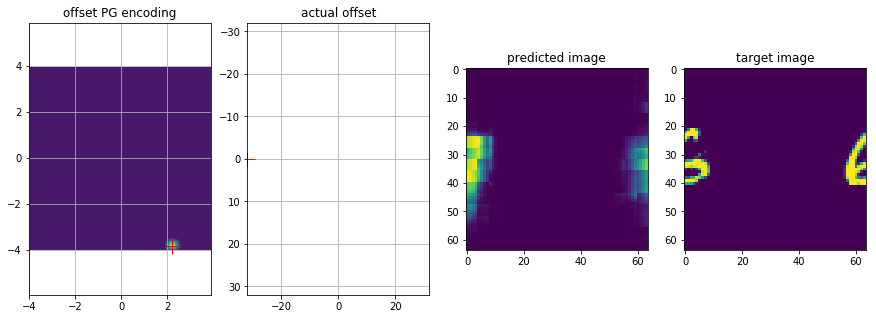

torch.Size([50, 1, 28, 28])
0 -28
[[ 0.36503447 -3.05460188]] [[ 0.27122179 -2.94303908]]


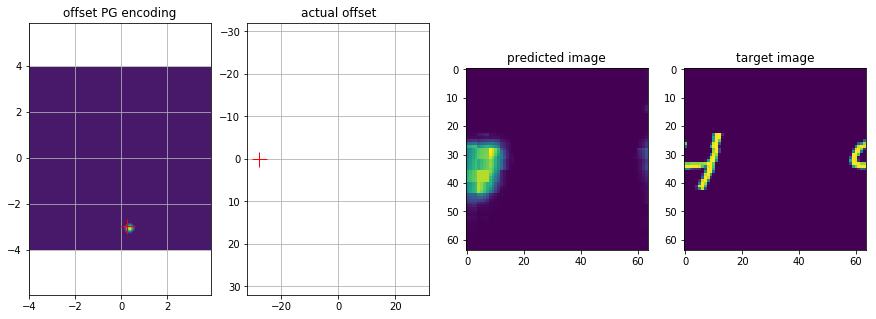

torch.Size([50, 1, 28, 28])
0 -24
[[-0.30657742 -2.31099875]] [[-0.26606257 -2.33313231]]


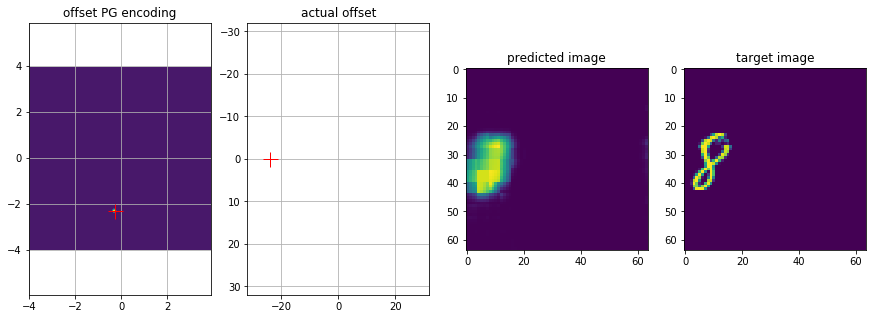

torch.Size([50, 1, 28, 28])
0 -20
[[-0.75130051 -1.59293939]] [[-0.7293948  -1.60233629]]


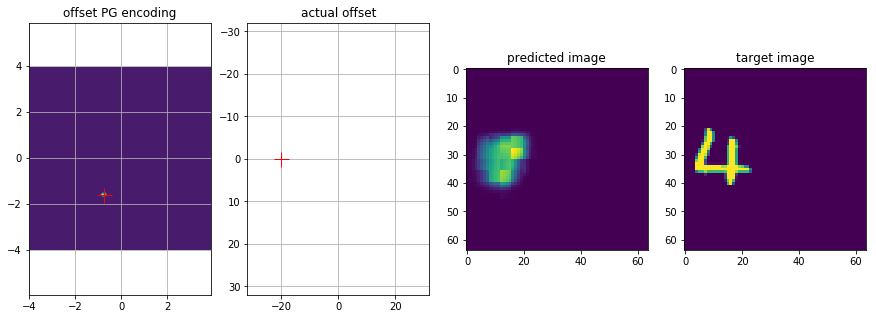

torch.Size([50, 1, 28, 28])
0 -16
[[-0.87787649 -1.2986006 ]] [[-0.86145579 -1.30635096]]


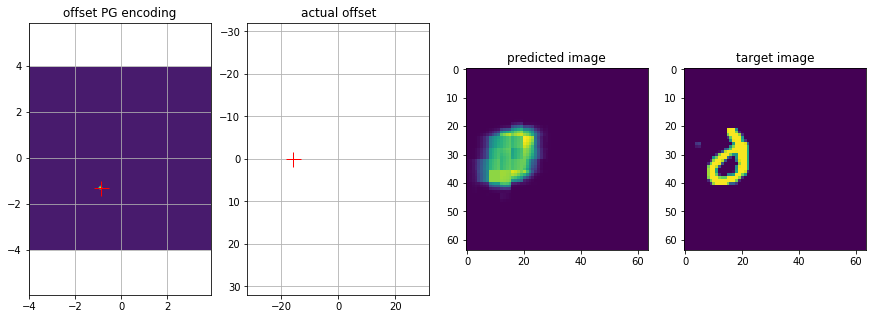

torch.Size([50, 1, 28, 28])
0 -12
[[-1.17794152 -0.75097314]] [[-1.17244846 -0.73682416]]


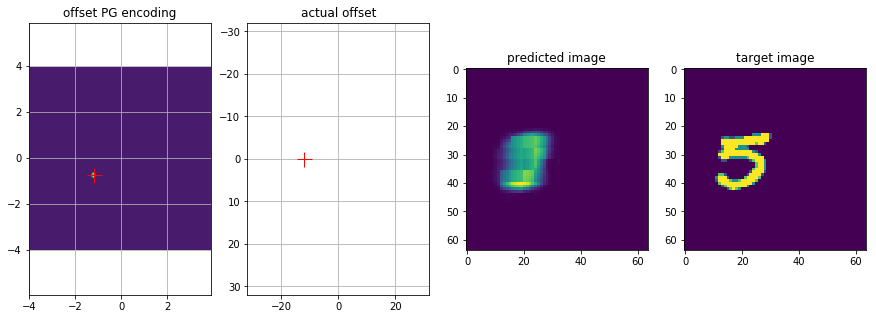

torch.Size([50, 1, 28, 28])
0 -8
[[-1.13248897 -0.33324298]] [[-1.1248803  -0.33931237]]


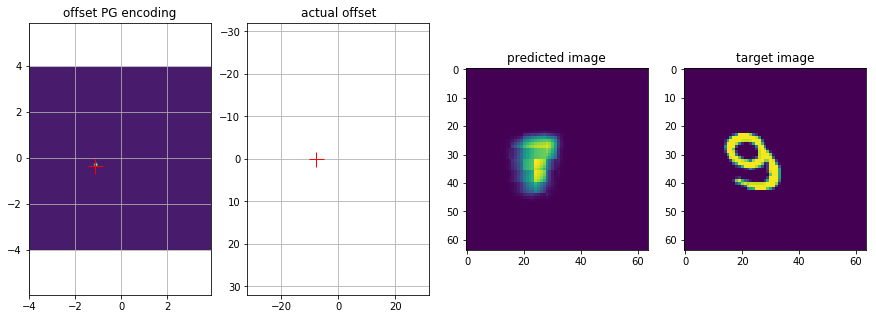

torch.Size([50, 1, 28, 28])
0 -4
[[-0.97584322  0.1319181 ]] [[-0.94714912  0.10984565]]


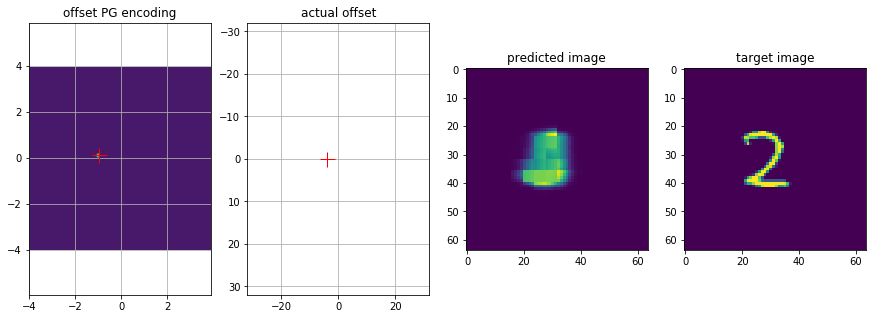

torch.Size([50, 1, 28, 28])
0 0
[[-0.82692967  0.44258605]] [[-0.83124093  0.46523273]]


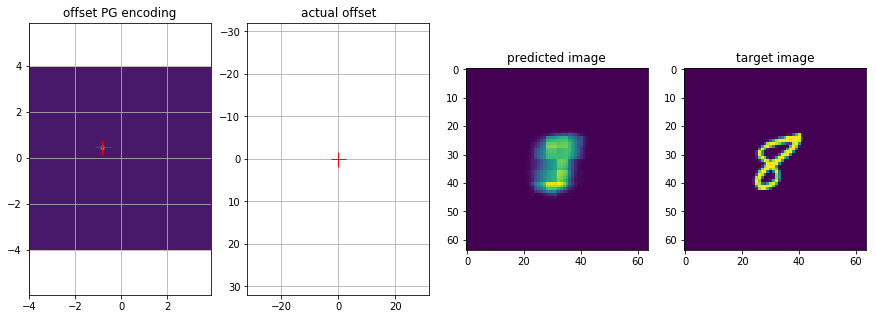

torch.Size([50, 1, 28, 28])
0 4
[[-0.40738447  0.66507431]] [[-0.41708265  0.67211529]]


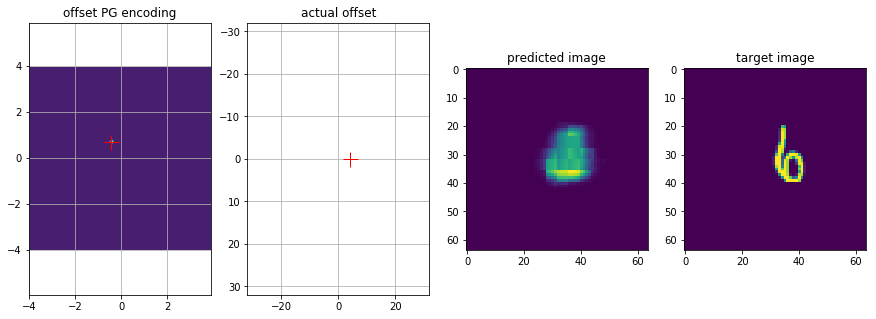

torch.Size([50, 1, 28, 28])
0 8
[[-0.15282695  0.96997877]] [[-0.13453395  0.96255241]]


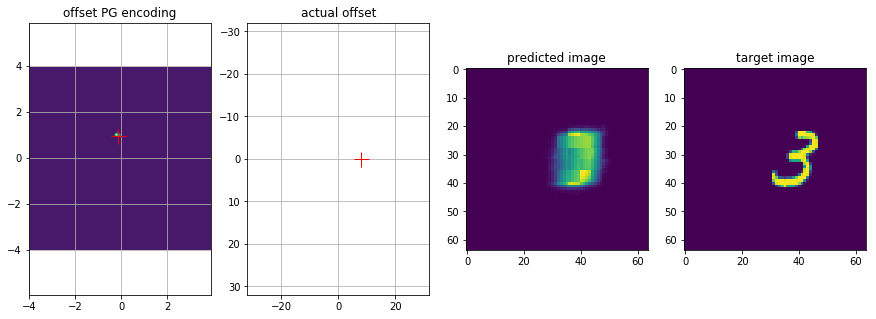

torch.Size([50, 1, 28, 28])
0 12
[[ 0.36965038  1.16103817]] [[ 0.32067606  1.19223042]]


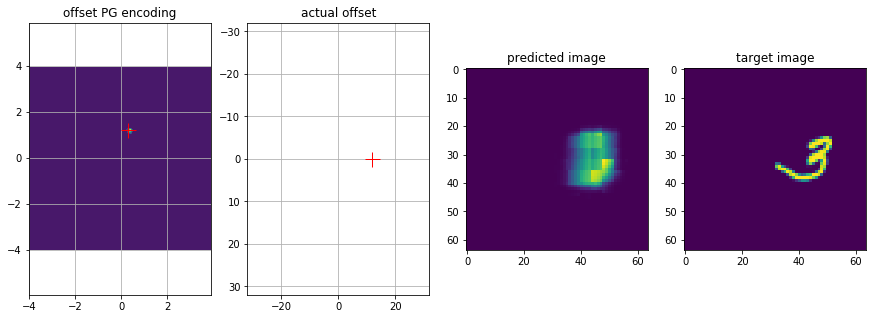

torch.Size([50, 1, 28, 28])
0 16
[[ 0.67709967  1.18575595]] [[ 0.60374673  1.17606436]]


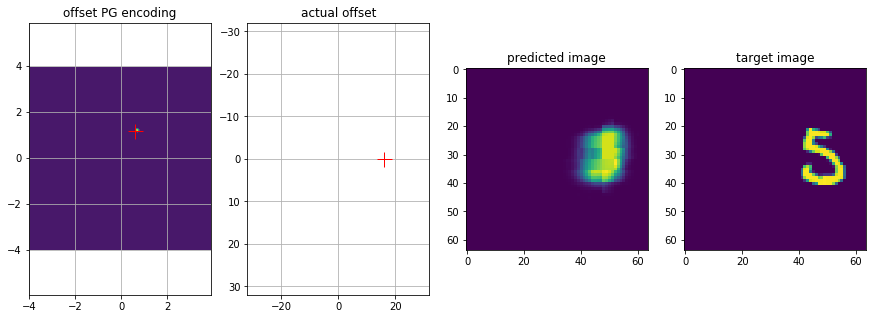

torch.Size([50, 1, 28, 28])
0 20
[[ 1.01516227  1.1957976 ]] [[ 0.98472114  1.20477151]]


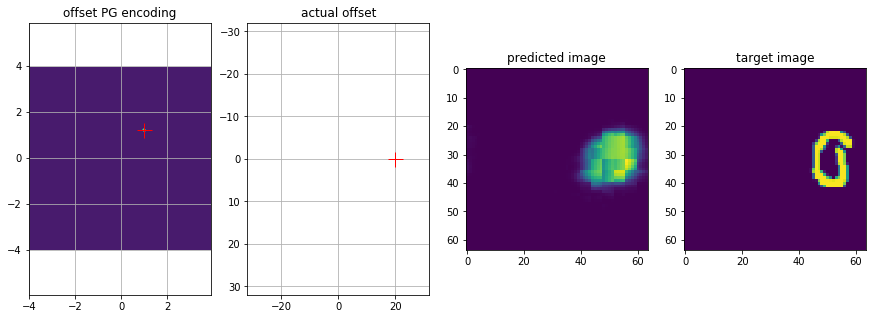

torch.Size([50, 1, 28, 28])
0 24
[[ 1.36373876  1.0119625 ]] [[ 1.33436106  0.99322205]]


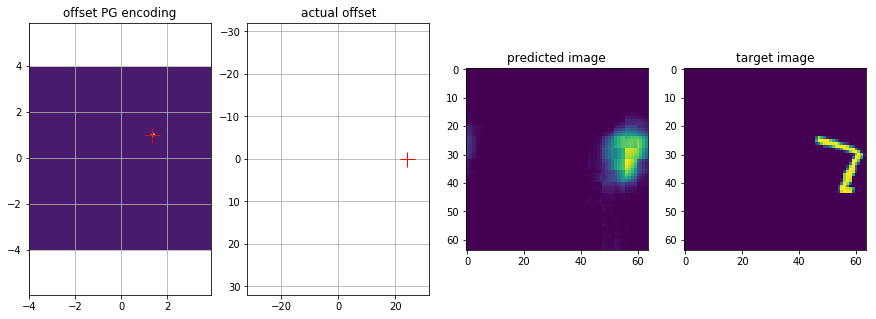

torch.Size([50, 1, 28, 28])
0 28
[[ 3.23129167 -2.81823549]] [[ 3.15608084 -2.86025905]]


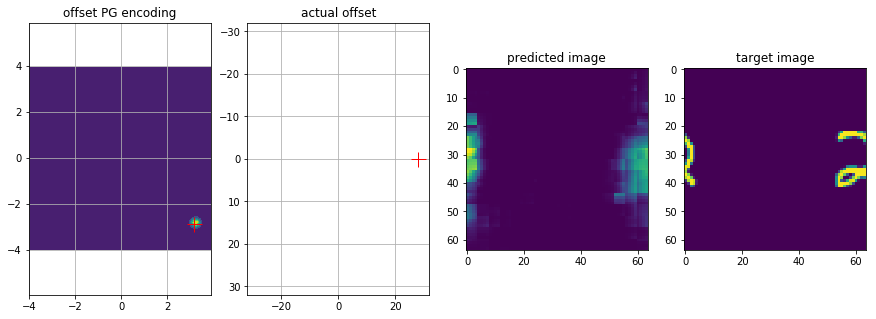

In [16]:
%matplotlib inline
import torch

from Where_act_code_VAE import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 4, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    mu_output, logvar_output, u_output, x_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[0:4]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset PG encoding')    
    ax[0].axis('equal')
    
    ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')
    
    plt.show()    

10 10


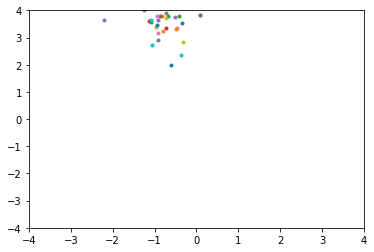

10 10


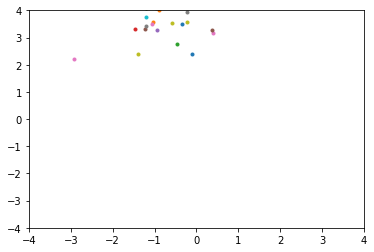

10 10


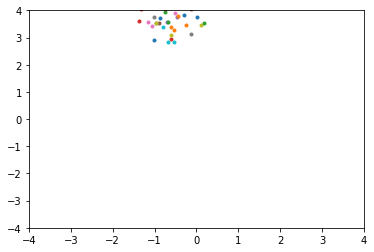

10 10


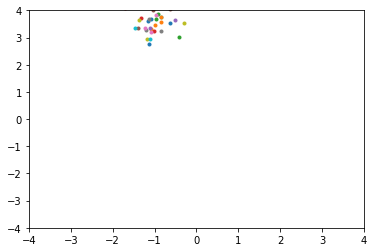

10 10


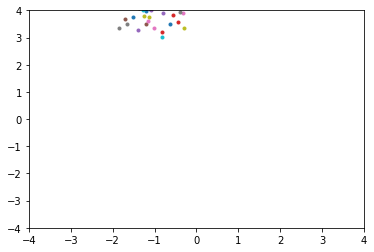

10 10


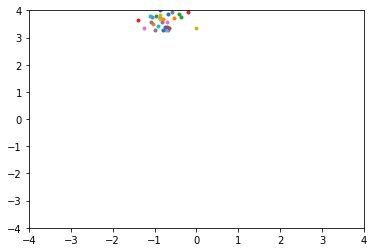

10 10


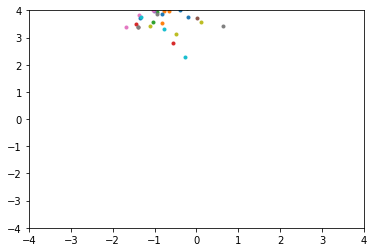

10 10


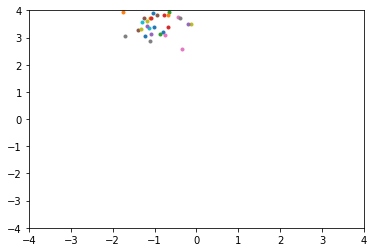

10 10


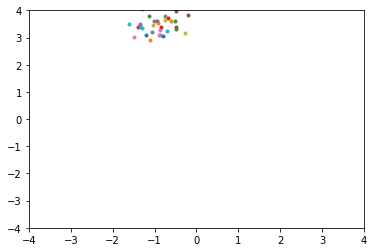

10 10


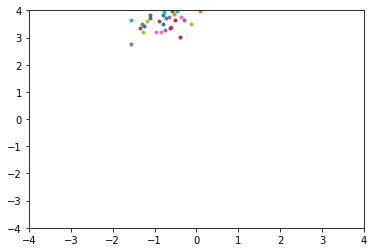

In [18]:
from Where_act_code_VAE import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for z in range(10):
    label[idx] = z
    i_offset = 10
    j_offset = 10
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[3:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)